<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Final Project Submission</a></span></li><li><span><a href="#general-functions" data-toc-modified-id="general-functions-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>general functions</a></span></li></ul></li><li><span><a href="#'tn.movie_budgets.csv'/-primary-budget-dataset" data-toc-modified-id="'tn.movie_budgets.csv'/-primary-budget-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>'tn.movie_budgets.csv'/ primary budget dataset</a></span><ul class="toc-item"><li><span><a href="#convert-strings/integers/floats/NaN-for-money-columns" data-toc-modified-id="convert-strings/integers/floats/NaN-for-money-columns-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>convert strings/integers/floats/NaN for money columns</a></span></li><li><span><a href="#Datetime-calculations-and-column-additions" data-toc-modified-id="Datetime-calculations-and-column-additions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Datetime calculations and column additions</a></span><ul class="toc-item"><li><span><a href="#season-from-datetime" data-toc-modified-id="season-from-datetime-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>season from datetime</a></span></li></ul></li><li><span><a href="#create-new-column-to-show-profit-margin" data-toc-modified-id="create-new-column-to-show-profit-margin-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>create new column to show profit margin</a></span></li><li><span><a href="#organize-dataframe-for-readability" data-toc-modified-id="organize-dataframe-for-readability-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>organize dataframe for readability</a></span></li><li><span><a href="#create-recent_budgets_df-to-for-2009-2019-movies" data-toc-modified-id="create-recent_budgets_df-to-for-2009-2019-movies-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>create recent_budgets_df to for 2009-2019 movies</a></span></li><li><span><a href="#visualize-data" data-toc-modified-id="visualize-data-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>visualize data</a></span></li></ul></li><li><span><a href="#rotten_tomatoes_movies.csv-dataset-for-reviews/genres" data-toc-modified-id="rotten_tomatoes_movies.csv-dataset-for-reviews/genres-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>rotten_tomatoes_movies.csv dataset for reviews/genres</a></span><ul class="toc-item"><li><span><a href="#merge-for-complete-dataset-'recent_movies_df'" data-toc-modified-id="merge-for-complete-dataset-'recent_movies_df'-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>merge for complete dataset 'recent_movies_df'</a></span></li><li><span><a href="#duplicates-check-and-clean-up-for-recent_movies_df" data-toc-modified-id="duplicates-check-and-clean-up-for-recent_movies_df-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>duplicates check and clean up for recent_movies_df</a></span></li></ul></li><li><span><a href="#data-visualization-for-movies-2009-2019-'recent_movies_df'" data-toc-modified-id="data-visualization-for-movies-2009-2019-'recent_movies_df'-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>data visualization for movies 2009-2019 'recent_movies_df'</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Visualize-data-for-Top-100-HIghest-Earning-Movies-(domestic)-'top_50_dg'" data-toc-modified-id="Visualize-data-for-Top-100-HIghest-Earning-Movies-(domestic)-'top_50_dg'-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Visualize data for Top 100 HIghest Earning Movies (domestic) 'top_50_dg'</a></span></li><li><span><a href="#Visualize-Data-for-Top-100-Profitable-Movies" data-toc-modified-id="Visualize-Data-for-Top-100-Profitable-Movies-3.0.2"><span class="toc-item-num">3.0.2&nbsp;&nbsp;</span>Visualize Data for Top 100 Profitable Movies</a></span></li><li><span><a href="#What-types-of-movies-make-the-most-money-compared-to-their-original-budget/-most-profitable" data-toc-modified-id="What-types-of-movies-make-the-most-money-compared-to-their-original-budget/-most-profitable-3.0.3"><span class="toc-item-num">3.0.3&nbsp;&nbsp;</span>What types of movies make the most money compared to their original budget/ most profitable</a></span></li></ul></li></ul></li></ul></div>

## Final Project Submission

Please fill out:
* Student name: Brennan Mathis
* Student pace: part time 
* Scheduled project review date/time: 3/17/2020 2pm 
* Instructor name: Victor Geislinger
* Blog post URL: https://datainsights.data.blog/2020/03/15/movie-industry-analysis/

* What problem that is being solved in regards to dataset
    * production costs vs  gross
    * trending studios/genres/directors
    * release dates and correlation to success
    * high gross movie assessment
    * profit margin assessment 
    * international vs domestic success
    * audience ratings with regard to success
    
* Project questions to be answered with data
    * What types of movies make the highest profits at the box office?
    * What types of movies make the most at the box office?
        * Are these different? How so? Why?
    * Does the season of the movie release relate to how well the movie performs at
      the box office?
        * How so? 

    

In [593]:
import pandas as pd
import datetime
import matplotlib 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## general functions

In [594]:
# function taking the number of isnull items and divides by the total 
# length of the dataframe to find percentage
# of missing data for "x"

def perc_missing(missing, total):
    return (len(missing)/len(total))
    

In [595]:
# function to remove commas and $ from string money values in dataframe 
# interpret all values as regex
# replace values in place
def char_strip(df):
    df = df.replace({'\$': '', '&': '', ',': ''}, inplace=True, regex=True)   

In [596]:
# return season using month of release date
# winter for any month before march
#spring months march to may
#summer months june to august
# fall months september and october
# winter holiday for november and december

def seasons(series):
    return series.map(lambda x: "winter" if x < 3 
                                         else ("spring" if x < 6 
                                         else ("summer" if x < 9 
                                         else ("fall" if x <11 
                                         else "winter/holiday" ))))

In [597]:
# profit margin
def ratio_budget_gross(gross, budget):
    profit = (gross - budget)
    return profit/budget

# 'tn.movie_budgets.csv'/ primary budget dataset

In [598]:
tn_budgets_df = pd.read_csv('tn.movie_budgets.csv')
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [599]:
tn_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [600]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## convert strings/integers/floats/NaN for money columns

In [601]:
char_strip(tn_budgets_df['domestic_gross'])
char_strip(tn_budgets_df['worldwide_gross'])
char_strip(tn_budgets_df['production_budget'])

In [602]:
tn_budgets_df['production_budget'] = pd.to_numeric(tn_budgets_df['production_budget'], errors='coerce')
tn_budgets_df['domestic_gross'] = pd.to_numeric(tn_budgets_df['domestic_gross'], errors='coerce')
tn_budgets_df['worldwide_gross'] = pd.to_numeric(tn_budgets_df['worldwide_gross'], errors='coerce')

In [603]:
tn_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget     int64
domestic_gross        int64
worldwide_gross       int64
dtype: object

In [604]:
tn_budgets_df.sort_values('production_budget', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [605]:
# converting zeros to NaN, which changes dtype to float from int

tn_budgets_df.replace(0, np.nan, inplace=True)

## Datetime calculations and column additions

In [606]:
tn_budgets_df['release_date'] = pd.to_datetime(tn_budgets_df['release_date'])


In [607]:
# adding month and year columns for exploration

tn_budgets_df['year'] = tn_budgets_df.release_date.dt.year
tn_budgets_df['month'] = tn_budgets_df.release_date.dt.month


### season from datetime 

In [608]:
# adding season column to assess whether release timing affects success
tn_budgets_df['release_season'] = seasons(tn_budgets_df['month'])

In [609]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,release_season
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,2009,12,winter/holiday
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,2011,5,spring
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,2019,6,summer
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,2015,5,spring
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,2017,12,winter/holiday


In [610]:
tn_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 9 columns):
id                   5782 non-null int64
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null int64
domestic_gross       5234 non-null float64
worldwide_gross      5415 non-null float64
year                 5782 non-null int64
month                5782 non-null int64
release_season       5782 non-null object
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 406.7+ KB


In [611]:
tn_budgets_df.isna().sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross       548
worldwide_gross      367
year                   0
month                  0
release_season         0
dtype: int64

In [612]:
# missing values
tn_missing_ww = tn_budgets_df[tn_budgets_df['worldwide_gross'].isnull()]
tn_missing_dom = tn_budgets_df[tn_budgets_df['domestic_gross'].isnull()]
perc_missing(tn_missing_dom, tn_budgets_df)
perc_missing(tn_missing_ww, tn_budgets_df)

0.06347284676582497

## create new column to show profit margin

In [613]:
# create columns containing decimals, round to 4 decimal places to allow for percentage conversion
tn_budgets_df['intl_profit_margin'] = ratio_budget_gross(tn_budgets_df['worldwide_gross'], tn_budgets_df['production_budget']).round(4)
tn_budgets_df['domestic_profit_margin'] = ratio_budget_gross(tn_budgets_df['domestic_gross'], tn_budgets_df['production_budget']).round(4)

In [614]:
tn_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,release_season,intl_profit_margin,domestic_profit_margin
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,2009,12,winter/holiday,5.5326,0.7894
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,2011,5,spring,1.5467,-0.4129
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,2019,6,summer,-0.5721,-0.8778
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,2015,5,spring,3.2438,0.3884
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,2017,12,winter/holiday,3.1537,0.9564


In [615]:
# though this encompasses a signnificant amount of data, 
# it is neccessary for my calculations to have this data
# removing missing domestic gross values also removes the 
# missing worldwide values
tn_budgets_df = tn_budgets_df.dropna(subset=['domestic_gross'])

## organize dataframe for readability

In [616]:
tn_budgets_df = tn_budgets_df.rename(columns={"movie": "title"})

In [617]:
tn_budgets_df = tn_budgets_df[[ 'title', 'production_budget', 'domestic_gross', 'domestic_profit_margin',
                         'worldwide_gross', 'intl_profit_margin', 'release_date', 'month', 'year', 'release_season']]

## create recent_budgets_df to for 2009-2019 movies

In [618]:
# new dataframe with specified year range

recent_budgets_df = tn_budgets_df[tn_budgets_df['year']>=2009]
recent_budgets_df = recent_budgets_df[recent_budgets_df['year'] <=2019 ]

In [619]:
recent_budgets_df.describe()

,production_budget,domestic_gross,domestic_profit_margin,worldwide_gross,intl_profit_margin,month,year
count,1.992000e+03,1.992000e+03,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000
mean,4.263833e+07,5.384365e+07,0.968741,1.346788e+08,2.989400,6.737450,2013.259036
std,5.442166e+07,8.512460e+07,8.057928,2.330044e+08,14.679115,3.408242,2.888549
min,9.000000e+03,3.880000e+02,-1.000000,5.280000e+02,-0.999900,1.000000,2009.000000
25%,8.000000e+06,3.093814e+06,-0.715850,9.375092e+06,-0.150400,4.000000,2011.000000
50%,2.100000e+07,2.491519e+07,-0.091650,4.758726e+07,1.140900,7.000000,2013.000000
75%,5.000000e+07,6.500514e+07,0.899775,1.497284e+08,3.060025,10.000000,2016.000000
max,4.250000e+08,9.366622e+08,238.819600,2.776345e+09,430.517900,12.000000,2019.000000


In [620]:
# duplicate value assessment
duplicates_recent = recent_budgets_df[recent_budgets_df.duplicated(['title'], keep=False)]
duplicates_recent.sort_values('title')

# these are all different movies or remakes based on release date

,title,production_budget,domestic_gross,domestic_profit_margin,worldwide_gross,intl_profit_margin,release_date,month,year,release_season
2140,Brothers,26000000,28544157.0,0.0979,45043870.0,0.7325,2009-12-04,12,2009,winter/holiday
3307,Brothers,13000000,656688.0,-0.9495,17856688.0,0.3736,2015-08-14,8,2015,summer
243,Home,130000000,177397510.0,0.3646,385997896.0,1.9692,2015-03-27,3,2015,spring
5459,Home,500000,15433.0,-0.9691,44793168.0,88.5863,2009-04-23,4,2009,spring
38,Robin Hood,210000000,105487148.0,-0.4977,322459006.0,0.5355,2010-05-14,5,2010,spring
408,Robin Hood,99000000,30824628.0,-0.6886,84747441.0,-0.1440,2018-11-21,11,2018,winter/holiday
5009,The Square,1900000,406216.0,-0.7862,740932.0,-0.6100,2010-04-09,4,2010,spring
5099,The Square,1500000,124244.0,-0.9172,176262.0,-0.8825,2013-10-25,10,2013,fall


In [621]:
duplicates = tn_budgets_df[tn_budgets_df.duplicated(['title'], keep=False)]
duplicates.sort_values('title')

,title,production_budget,domestic_gross,domestic_profit_margin,worldwide_gross,intl_profit_margin,release_date,month,year,release_season
4270,"20,000 Leagues Under the Sea",5000000,28200000.0,4.6400,28200000.0,4.6400,1954-12-23,12,1954,winter/holiday
5614,"20,000 Leagues Under the Sea",200000,8000000.0,39.0000,8000000.0,39.0000,1916-12-24,12,1916,winter/holiday
5016,A Nightmare on Elm Street,1800000,25504513.0,13.1692,25504513.0,13.1692,1984-11-09,11,1984,winter/holiday
1648,A Nightmare on Elm Street,35000000,63075011.0,0.8021,117729621.0,2.3637,2010-04-30,4,2010,spring
80,Aladdin,182000000,246734314.0,0.3557,619234314.0,2.4024,2019-05-24,5,2019,spring
...,...,...,...,...,...,...,...,...,...,...
2838,Unforgettable,18000000,2483790.0,-0.8620,2483790.0,-0.8620,1996-02-23,2,1996,winter
4583,Unknown,3700000,26403.0,-0.9929,3355048.0,-0.0932,2006-11-03,11,2006,winter/holiday
1420,Unknown,40000000,63686397.0,0.5922,136123083.0,2.4031,2011-02-18,2,2011,winter
302,Venom,116000000,213511408.0,0.8406,853628605.0,6.3589,2018-10-05,10,2018,fall


In [622]:
# assess statistics of column values
recent_budgets_df.describe()

,production_budget,domestic_gross,domestic_profit_margin,worldwide_gross,intl_profit_margin,month,year
count,1.992000e+03,1.992000e+03,1992.000000,1.992000e+03,1992.000000,1992.000000,1992.000000
mean,4.263833e+07,5.384365e+07,0.968741,1.346788e+08,2.989400,6.737450,2013.259036
std,5.442166e+07,8.512460e+07,8.057928,2.330044e+08,14.679115,3.408242,2.888549
min,9.000000e+03,3.880000e+02,-1.000000,5.280000e+02,-0.999900,1.000000,2009.000000
25%,8.000000e+06,3.093814e+06,-0.715850,9.375092e+06,-0.150400,4.000000,2011.000000
50%,2.100000e+07,2.491519e+07,-0.091650,4.758726e+07,1.140900,7.000000,2013.000000
75%,5.000000e+07,6.500514e+07,0.899775,1.497284e+08,3.060025,10.000000,2016.000000
max,4.250000e+08,9.366622e+08,238.819600,2.776345e+09,430.517900,12.000000,2019.000000


## visualize data

[Text(0, 0.5, '$'), Text(0.5, 1.0, 'Boxplot Budgets Vs Gross')]

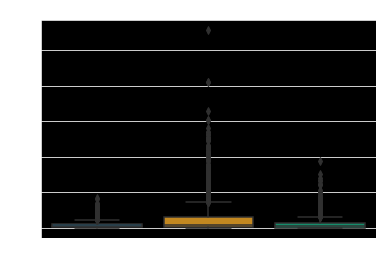

In [623]:

budget_gross_df = recent_budgets_df.filter(['production_budget', 'worldwide_gross', 'domestic_gross'], axis=1)
boxplot = sns.boxplot(data=budget_gross_df, palette="colorblind")
boxplot.set(ylabel='$', title='Boxplot Budgets Vs Gross')


In [624]:
# correlation coefficient
# does the production budget affect the monetary success of a movie/ 
#does the success domestically affect the success internationally
recent_budgets_df.corr(method ='pearson')
# budget, domestic gross, worldwide gross show correlation 
#with correlation coefficients close to 1

,production_budget,domestic_gross,domestic_profit_margin,worldwide_gross,intl_profit_margin,month,year
production_budget,1.000000,0.727817,-0.068674,0.790767,-0.044364,0.027431,0.079010
domestic_gross,0.727817,1.000000,0.070929,0.941651,0.089235,0.040869,0.095399
domestic_profit_margin,-0.068674,0.070929,1.000000,0.032561,0.975484,-0.006643,0.016847
worldwide_gross,0.790767,0.941651,0.032561,1.000000,0.076244,0.043533,0.102200
intl_profit_margin,-0.044364,0.089235,0.975484,0.076244,1.000000,0.003105,0.010214
month,0.027431,0.040869,-0.006643,0.043533,0.003105,1.000000,-0.058085
year,0.079010,0.095399,0.016847,0.102200,0.010214,-0.058085,1.000000


# rotten_tomatoes_movies.csv dataset for reviews/genres

In [625]:
rt_df = pd.read_csv("rotten_tomatoes_movies.csv")
rt_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [626]:
rt_df = rt_df.rename(columns={"movie_title": "title"})

In [627]:
rt_df = rt_df.drop(columns=['on_streaming_date', 'rotten_tomatoes_link', 'audience_count', 'audience_top_critics_count', 'audience_fresh_critics_count', 
                               'audience_rotten_critics_count','tomatometer_count', 'in_theaters_date', 'movie_info', 'rotten_tomatoes_link', 
                               'runtime_in_minutes', 'cast', 'critics_consensus', 'poster_image_url', 'tomatometer_status', 'tomatometer_rating'])

In [628]:
# removing characters from genre column, using only first genre given for new column 'primary_genre'
char_strip(rt_df['genre'])
rt_df['primary_genre'] = rt_df['genre'].str.split().str[0]

In [629]:
# removing characters from genre column, using only first genre given for new column 'primary_genre'
complete_movies_df = pd.merge(tn_budgets_df, rt_df, on='title', how='inner')


## merge for complete dataset 'recent_movies_df'

In [630]:
# merge for complete dataset 'recent_movies_df'
recent_movies_df =  pd.merge(recent_budgets_df, rt_df, on='title', how='inner')


In [631]:
recent_movies_df.isna().sum()

title                      0
production_budget          0
domestic_gross             0
domestic_profit_margin     0
worldwide_gross            0
intl_profit_margin         0
release_date               0
month                      0
year                       0
release_season             0
rating                     0
genre                      0
directors                 13
writers                   34
studio_name                9
audience_status            3
audience_rating            3
primary_genre              0
dtype: int64

In [632]:
# create gross columns with totals/100000 for readability in graphing
recent_movies_df['worldwide_gross /100,000'] = recent_movies_df['worldwide_gross']/100000
recent_movies_df['domestic_gross /100,000'] = recent_movies_df['domestic_gross']/100000
recent_movies_df['production_budget /100,000'] = recent_movies_df['production_budget']/100000

In [633]:
recent_movies_df.columns

Index(['title', 'production_budget', 'domestic_gross',
       'domestic_profit_margin', 'worldwide_gross', 'intl_profit_margin',
       'release_date', 'month', 'year', 'release_season', 'rating', 'genre',
       'directors', 'writers', 'studio_name', 'audience_status',
       'audience_rating', 'primary_genre', 'worldwide_gross /100,000',
       'domestic_gross /100,000', 'production_budget /100,000'],
      dtype='object')

In [634]:
recent_movies_df = recent_movies_df[[ 'title', 'production_budget','production_budget /100,000', 'domestic_gross', 
                                      'domestic_gross /100,000', 'domestic_profit_margin', 'worldwide_gross', 
                                      'worldwide_gross /100,000', 'intl_profit_margin', 'release_date', 'month', 'year', 
                                      'release_season', 'rating', 'genre', 'directors', 'writers', 'studio_name', 
                                      'audience_status', 'audience_rating', 'primary_genre']]

In [635]:
recent_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1755 entries, 0 to 1754
Data columns (total 21 columns):
title                         1755 non-null object
production_budget             1755 non-null int64
production_budget /100,000    1755 non-null float64
domestic_gross                1755 non-null float64
domestic_gross /100,000       1755 non-null float64
domestic_profit_margin        1755 non-null float64
worldwide_gross               1755 non-null float64
worldwide_gross /100,000      1755 non-null float64
intl_profit_margin            1755 non-null float64
release_date                  1755 non-null datetime64[ns]
month                         1755 non-null int64
year                          1755 non-null int64
release_season                1755 non-null object
rating                        1755 non-null object
genre                         1755 non-null object
directors                     1742 non-null object
writers                       1721 non-null object
studio_name   

In [636]:
print(len(recent_movies_df))

1755


In [637]:
year_count = recent_movies_df.groupby('year')
year_count['year'].count()

year
2009    177
2010    217
2011    195
2012    189
2013    167
2014    169
2015    174
2016    164
2017    135
2018    125
2019     43
Name: year, dtype: int64

## duplicates check and clean up for recent_movies_df

In [638]:
duplicates_recent = recent_movies_df[recent_movies_df.duplicated(['title'], keep=False)]
duplicates_recent.sort_values('title')



,title,production_budget,"production_budget /100,000",domestic_gross,"domestic_gross /100,000",domestic_profit_margin,worldwide_gross,"worldwide_gross /100,000",intl_profit_margin,release_date,...,year,release_season,rating,genre,directors,writers,studio_name,audience_status,audience_rating,primary_genre
679,A Nightmare on Elm Street,35000000,350.0,63075011.0,630.75011,0.8021,117729621.0,1177.29621,2.3637,2010-04-30,...,2010,spring,R,Drama Horror Mystery Suspense Science Fiction...,Samuel Bayer,"Wesley Strick, Eric Heisserer",Warner Bros. Pictures,Spilled,43.0,Drama
678,A Nightmare on Elm Street,35000000,350.0,63075011.0,630.75011,0.8021,117729621.0,1177.29621,2.3637,2010-04-30,...,2010,spring,R,Horror Mystery Suspense,Wes Craven,Wes Craven,New Line Cinema,Upright,83.0,Horror
1187,About Last Night,13000000,130.0,48637684.0,486.37684,2.7414,50445860.0,504.45860,2.8805,2014-02-14,...,2014,winter,R,Comedy Romance,Steve Pink,Leslye Headland,Sony Pictures,Upright,65.0,Comedy
1186,About Last Night,13000000,130.0,48637684.0,486.37684,2.7414,50445860.0,504.45860,2.8805,2014-02-14,...,2014,winter,R,Comedy Drama Romance,Edward Zwick,"David Mamet, Tim Kazurinsky, Denise DeClue",Sony Pictures Home Entertainment,Spilled,59.0,Comedy
698,Adrift,35000000,350.0,31445011.0,314.45011,-0.1016,57897191.0,578.97191,0.6542,2018-06-01,...,2018,summer,PG-13,Drama Romance,Baltasar Kormákur,"Aaron Kandell, Jordan Kandell, Aaron Kandell, ...",STXfilms,Upright,65.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,Wonder Woman,150000000,1500.0,412563408.0,4125.63408,1.7504,821133378.0,8211.33378,4.4742,2017-06-02,...,2017,summer,PG-13,Action Adventure Animation Drama Kids Family,Lauren Montgomery,Michael Jelenic,Warner Bros. Animation,Upright,78.0,Action
1388,Wuthering Heights,8000000,80.0,100915.0,1.00915,-0.9874,2721534.0,27.21534,-0.6598,2012-10-05,...,2012,fall,PG,Drama Romance,Peter Kosminsky,Anne Devlin,Paramount Pictures,Upright,66.0,Drama
1389,Wuthering Heights,8000000,80.0,100915.0,1.00915,-0.9874,2721534.0,27.21534,-0.6598,2012-10-05,...,2012,fall,NR,Drama Romance,Andrea Arnold,"Andrea Arnold, Olivia Hetreed",Oscilloscope Pictures,Spilled,47.0,Drama
1386,Wuthering Heights,8000000,80.0,100915.0,1.00915,-0.9874,2721534.0,27.21534,-0.6598,2012-10-05,...,2012,fall,G,Classics Drama Romance,William Wyler,"Ben Hecht, Charles MacArthur",United Artists,Upright,85.0,Classics


In [639]:
recent_movies_df = recent_movies_df.drop_duplicates(subset='title', keep='first')

In [640]:
# create df of 50 movies with highest domestic gross films from recent movies dataset. 
top_50_dg = recent_movies_df.sort_values('domestic_gross', ascending=False).iloc[0:50]


In [777]:
# create df of 50 movies with highest profit margin from recent movies dataset. 
top_50_dpm = recent_movies_df.sort_values('domestic_profit_margin', ascending=False).iloc[0:50]


In [754]:
recent_movies_df.describe()

,production_budget,"production_budget /100,000",domestic_gross,"domestic_gross /100,000",domestic_profit_margin,worldwide_gross,"worldwide_gross /100,000",intl_profit_margin,month,year,audience_rating
count,1.596000e+03,1596.000000,1.596000e+03,1596.000000,1596.000000,1.596000e+03,1596.000000,1596.000000,1596.000000,1596.000000,1595.000000
mean,4.479161e+07,447.916082,5.753063e+07,575.306333,1.138643,1.418156e+08,1418.156125,3.152734,6.724311,2013.238722,59.171160
std,5.555227e+07,555.522709,8.547988e+07,854.798806,8.847549,2.372736e+08,2372.736345,16.025131,3.423567,2.885055,18.444128
min,9.000000e+03,0.090000,9.180000e+02,0.009180,-1.000000,1.242000e+03,0.012420,-0.999900,1.000000,2009.000000,10.000000
25%,9.200000e+06,92.000000,5.355282e+06,53.552818,-0.606125,1.203209e+07,120.320863,-0.050275,4.000000,2011.000000,46.000000
50%,2.500000e+07,250.000000,2.878923e+07,287.892330,-0.023100,5.413252e+07,541.325215,1.203800,7.000000,2013.000000,60.000000
75%,5.500000e+07,550.000000,7.007460e+07,700.746027,1.075125,1.590509e+08,1590.508838,3.103400,10.000000,2016.000000,74.000000
max,4.250000e+08,4250.000000,7.605076e+08,7605.076250,238.819600,2.776345e+09,27763.452790,430.517900,12.000000,2019.000000,94.000000


In [757]:
print(recent_movies_df['production_budget'].max())
print(recent_movies_df['production_budget'].min())

425000000
9000


# data visualization for movies 2009-2019 'recent_movies_df'

Text(0.5, 0, 'Domestic Gross ($100,000)')

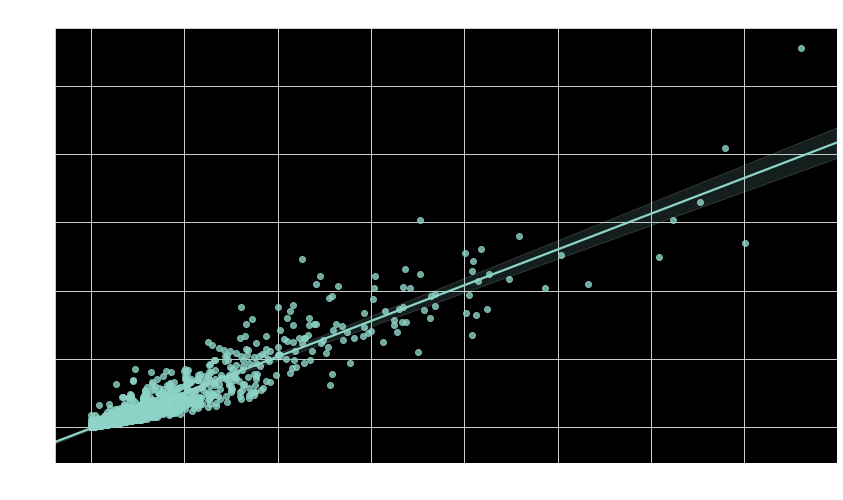

In [642]:
#linear regression 
# domestic vs international gross
plt.figure(figsize=(14,8))
sns.regplot( x='domestic_gross /100,000', y='worldwide_gross /100,000', data=recent_movies_df)
plt.title('Correlation Between Domestic and International Gross', fontsize=22)
plt.ylabel('International Gross ($100,000)')
plt.xlabel('Domestic Gross ($100,000)')

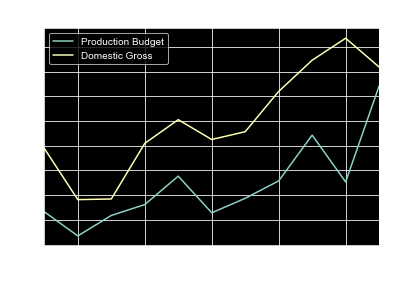

In [643]:
#budget vs domestic line plot 
#get means for each year
movies_pb_year = recent_movies_df.groupby("year")['production_budget /100,000'].mean().plot(kind='line')
movies_dg_year = recent_movies_df.groupby("year")['domestic_gross /100,000'].mean().plot(kind='line')
plt.legend(['Production Budget', 'Domestic Gross']);
plt.ylabel('Mean ($100,000)')
plt.xlabel('Year')


plt.title("Production Budget Relationship to Domestic Gross by Year", y=1.02, fontsize=14);

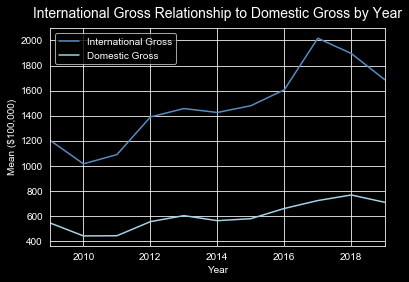

In [751]:
#international vs domestic line plot 
#get means for each year
movies_ww_year = recent_movies_df.groupby("year")['worldwide_gross /100,000'].mean().plot(kind='line')
movies_dg_year = recent_movies_df.groupby("year")['domestic_gross /100,000'].mean().plot(kind='line')

plt.legend(['International Gross', 'Domestic Gross']);
plt.ylabel('Mean ($100,000)')
plt.xlabel('Year')


plt.title("International Gross Relationship to Domestic Gross by Year", y=1.02, fontsize=14);

Text(0.5, 1, 'Correlation Between Domestic and International Gross by Year')

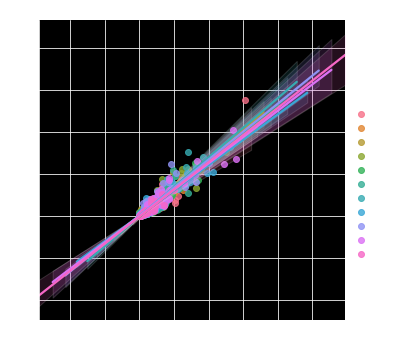

In [645]:
#international gross vs domestic gross by year
sns.lmplot( x='domestic_gross', y='worldwide_gross', hue='year', data=recent_movies_df)
plt.title('Correlation Between Domestic and International Gross by Year')

Text(0.5, 1.0, 'Domestic Gross  Movies 2009-2019')

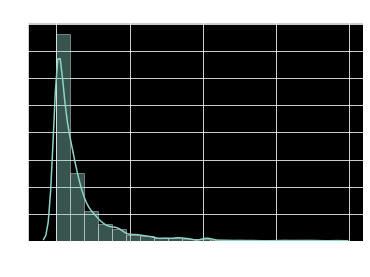

In [646]:
#distribution plot for domestic gross
sns.distplot(recent_movies_df['domestic_gross'], bins=20)
plt.title("Domestic Gross  Movies 2009-2019", fontsize=14)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

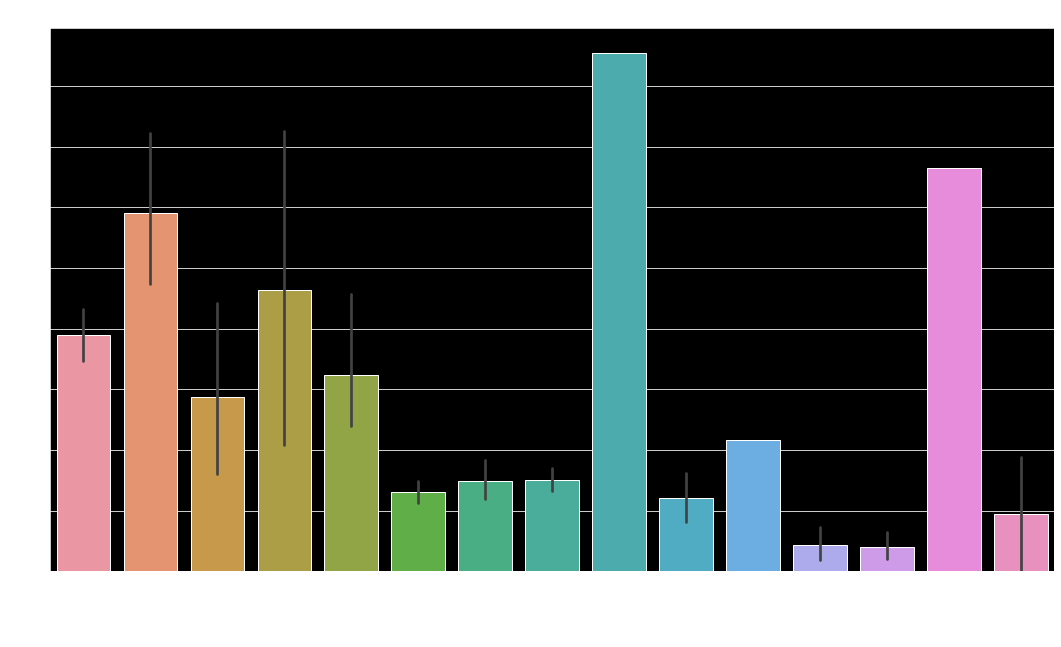

In [647]:
# domestic gross according to genre for 2009-2019
plt.figure(figsize=(18,10))
# Set theme
plt.style.use('dark_background')
plt.title("Domestic Gross by Genre 2009-2019", fontsize=20)
# bar
sns.barplot(x='primary_genre', y='domestic_gross /100,000', data=recent_movies_df)
plt.ylabel('Domestic Gross ($100,000)')
plt.xlabel('Genre')
plt.xticks(rotation=-45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

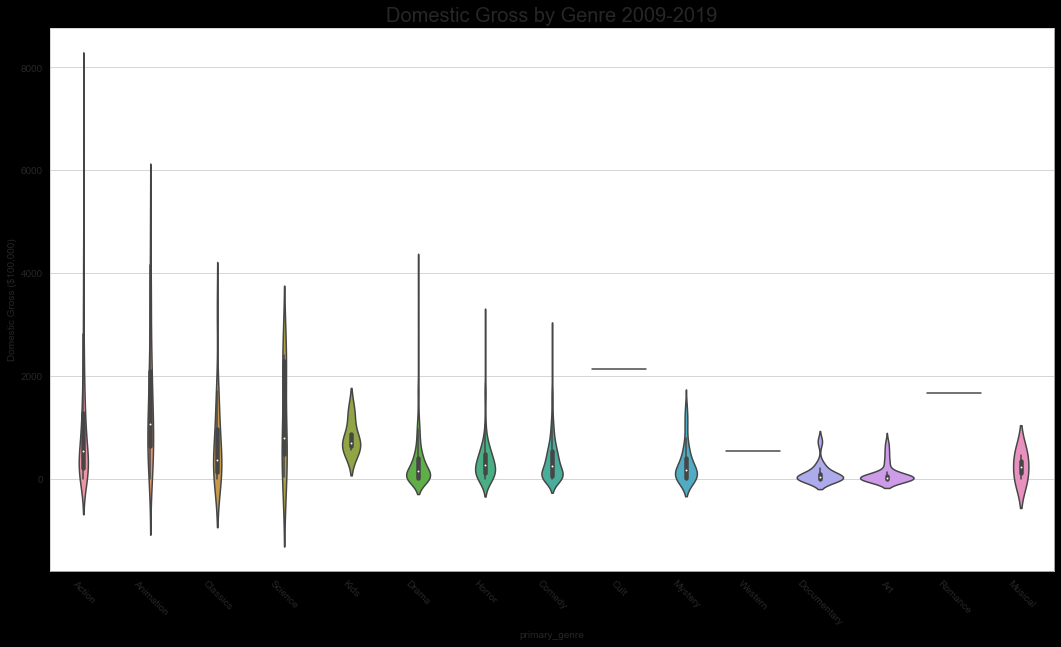

In [648]:
# domestic gross according to genre for 2009-2019
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("Domestic Gross by Genre 2009-2019", fontsize=20)
# Violin plot
sns.violinplot(x='primary_genre', y='domestic_gross /100,000', data=recent_movies_df)
plt.ylabel('Domestic Gross ($100,000)')
plt.xticks(rotation=-45)

Text(0.5, 0, 'Genre')

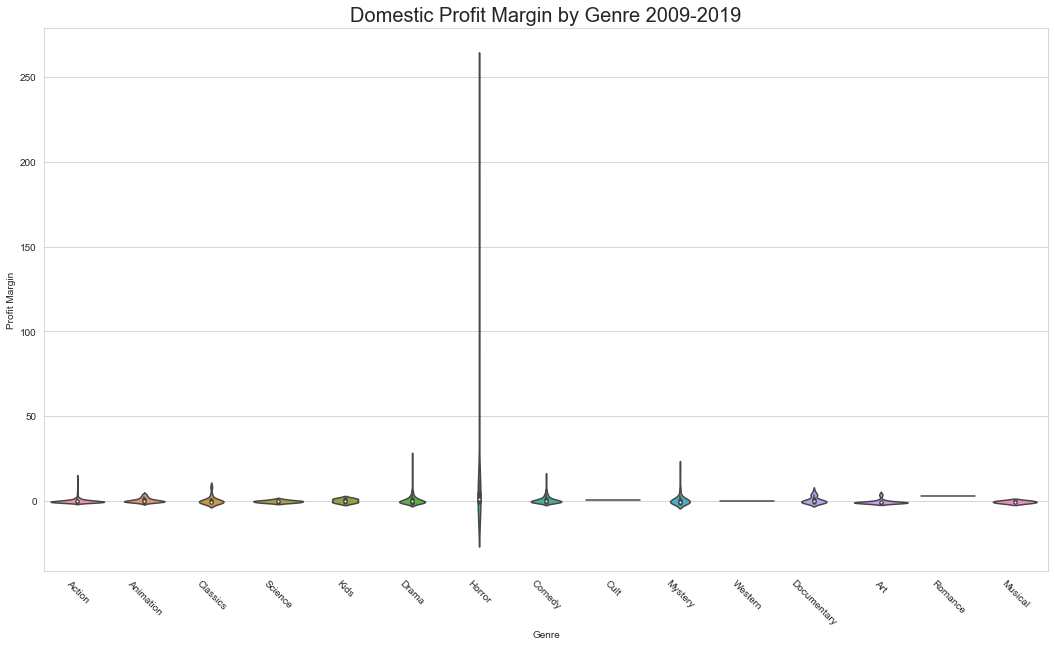

In [649]:
# Domestic Profit Margin by Genre 2009-2019
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("Domestic Profit Margin by Genre 2009-2019", fontsize=20)
# Violin plot
sns.violinplot(x='primary_genre', y='domestic_profit_margin', data=recent_movies_df)
plt.xticks(rotation=-45)
plt.ylabel('Profit Margin')
plt.xlabel('Genre')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

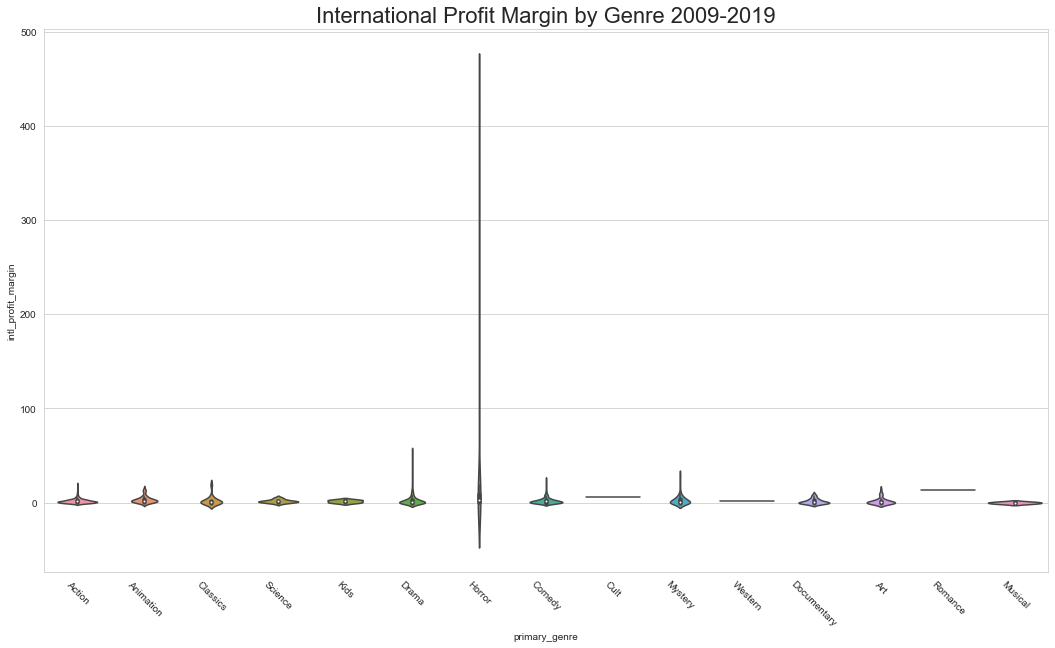

In [650]:
# International Profit Margin by Genre 2009-2019
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("International Profit Margin by Genre 2009-2019", fontsize=22)
# Violin plot
sns.violinplot(x='primary_genre', y='intl_profit_margin', data=recent_movies_df)
plt.xticks(rotation=-45)

Text(0.5, 0, 'Genre')

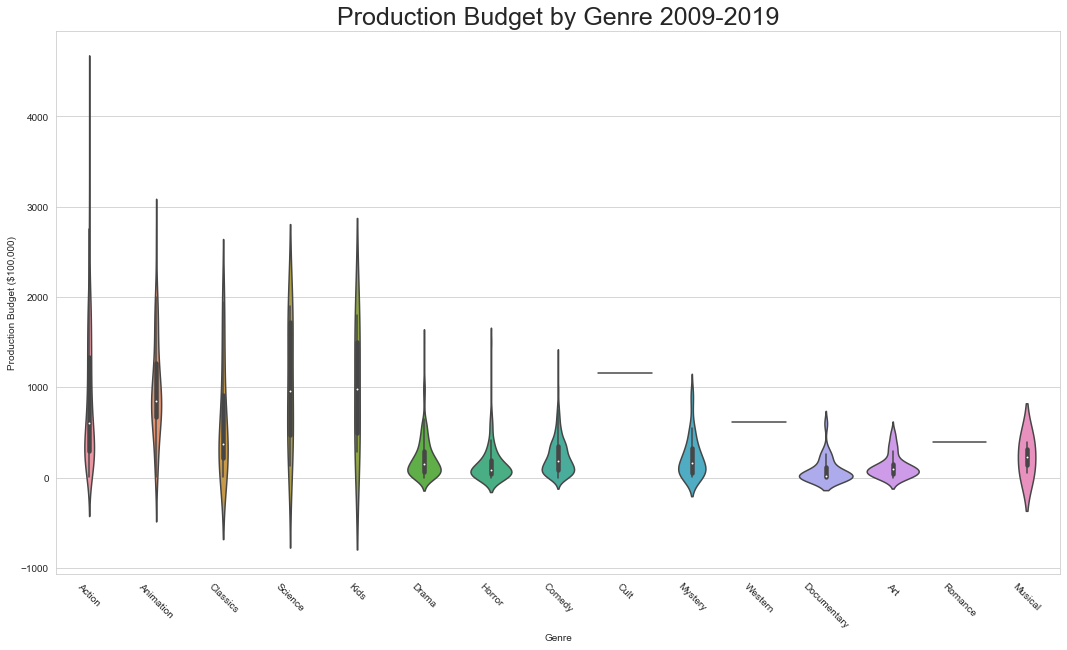

In [651]:
# Production Budget by Genre 2009-2019
plt.figure(figsize=(18,10))
# Set theme
sns.set_style('whitegrid')
plt.title("Production Budget by Genre 2009-2019", fontsize=25) 
 
# Violin plot
sns.violinplot(x='primary_genre', y='production_budget /100,000', data=recent_movies_df)
plt.xticks(rotation=-45)
plt.ylabel('Production Budget ($100,000)')
plt.xlabel('Genre')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

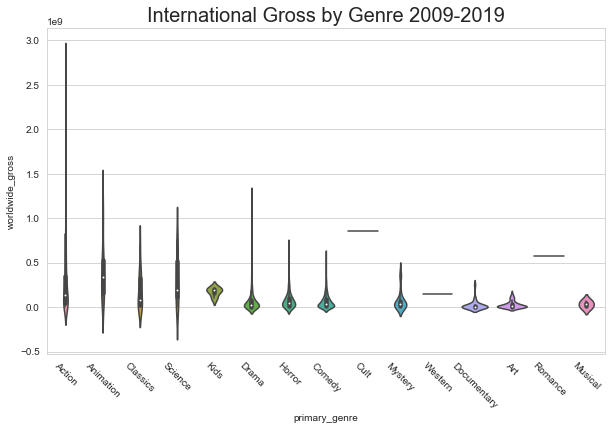

In [652]:
# International Gross by Genre 2009-2019
plt.figure(figsize=(10,6))
# Set theme
sns.set_style('whitegrid')
plt.title("International Gross by Genre 2009-2019", fontsize=20) 
# Violin plot
sns.violinplot(x='primary_genre', y='worldwide_gross', data=recent_movies_df)
plt.xticks(rotation=-45)

Text(0.5, 0, 'Genre')

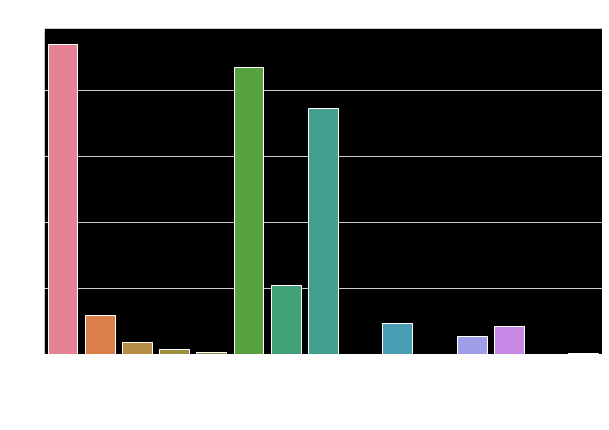

In [653]:
# Movie Genre Distribution  2009-2019
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='primary_genre', data=recent_movies_df, palette='husl')
plt.title("Movie Genre Distribution 2009-2019", fontsize=20)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Count')
plt.xlabel('Genre')

(array([-1.e+08,  0.e+00,  1.e+08,  2.e+08,  3.e+08,  4.e+08,  5.e+08]),
 <a list of 7 Text xticklabel objects>)

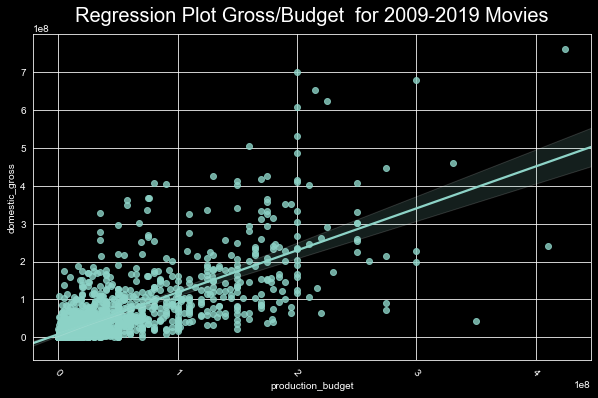

In [654]:
# Regression Plot Gross/Budget  for 2009-2019
plt.figure(figsize=(10,6))

# regression model
sns.regplot(x='production_budget', y='domestic_gross', data=recent_movies_df)
plt.title("Regression Plot Gross/Budget  for 2009-2019 Movies", fontsize=20, y =1.02)
# Rotate x-labels
plt.xticks(rotation=-45)


In [655]:
recent_movies_df.year.describe()

count    1596.000000
mean     2013.238722
std         2.885055
min      2009.000000
25%      2011.000000
50%      2013.000000
75%      2016.000000
max      2019.000000
Name: year, dtype: float64

Text(0.5, 1.02, 'Domestic Profit Margin by Year')

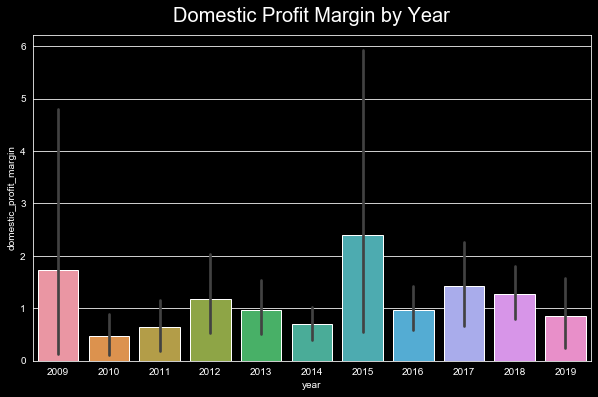

In [656]:
# domestic profit margin by year for recent movies
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='year', y='domestic_profit_margin', data=recent_movies_df)
plt.title("Domestic Profit Margin by Year", fontsize=20, y =1.02)

Text(0.5, 1.02, 'Domestic Gross by Year')

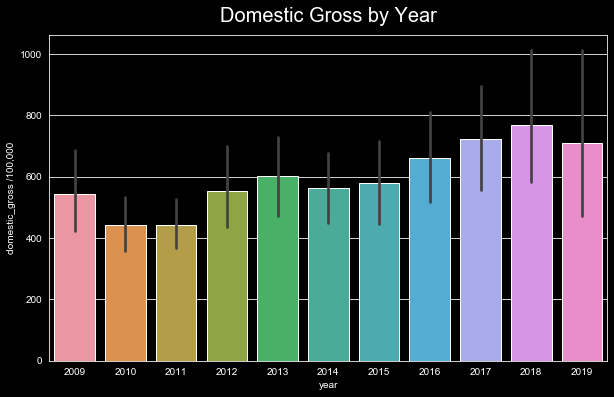

In [657]:
# domestic gross by year for recent movies
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='year', y='domestic_gross /100,000', data=recent_movies_df)
plt.title("Domestic Gross by Year", fontsize=20, y =1.02)



Text(0.5, 1.0, 'Production Budget by Year')

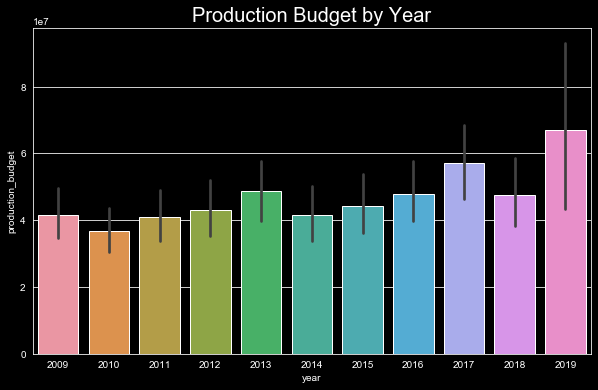

In [658]:
# budget by year bar graph
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='year', y='production_budget', data=recent_movies_df)
plt.title("Production Budget by Year", fontsize=20)


Text(0.5, 1, 'Domestic Gross Vs Production_Budget')

<Figure size 720x432 with 0 Axes>

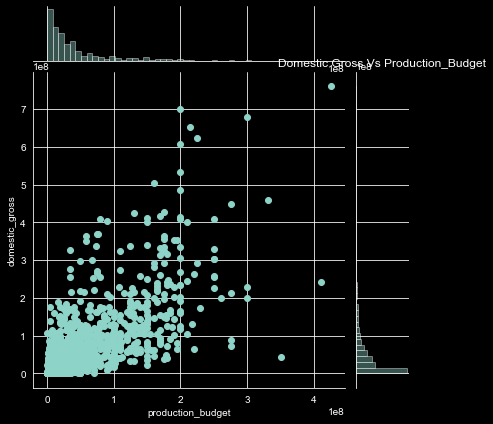

In [659]:
plt.figure(figsize=(10,6))

# Joint Plot for budget and domestic gross correlation
sns.jointplot(x='production_budget', y='domestic_gross', data=recent_movies_df)
plt.title("Domestic Gross Vs Production_Budget")


## Does the season of the movie release relate to how well the movie performs at the box office?

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text xticklabel objects>)

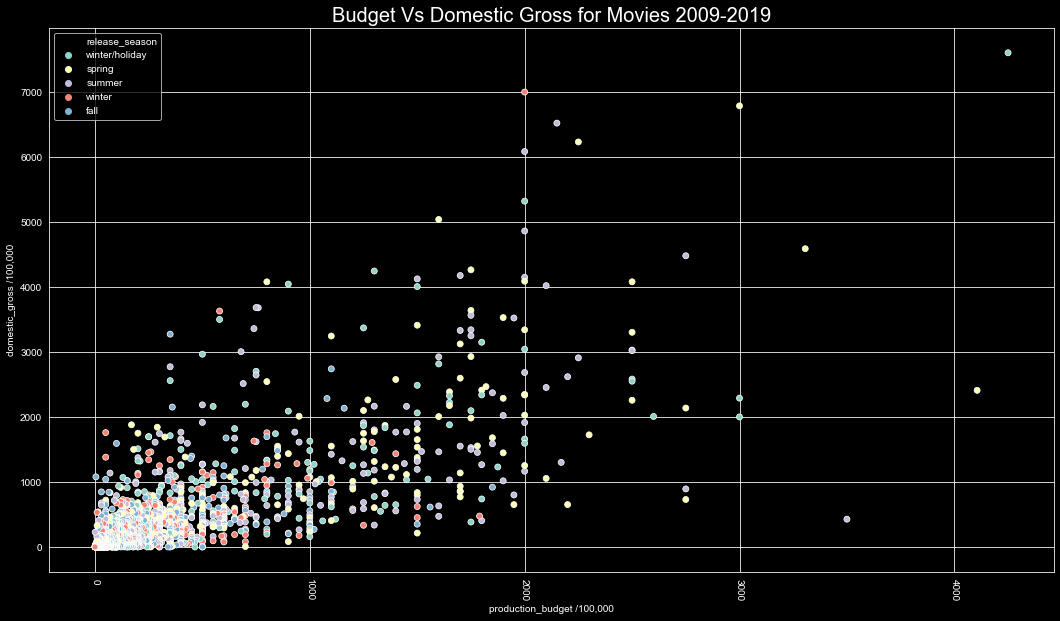

In [660]:
plt.figure(figsize=(18,10))

# Scatter Plot for budget and gross by season
sns.scatterplot(x='production_budget /100,000', y='domestic_gross /100,000', data=recent_movies_df, hue='release_season')
plt.title("Budget Vs Domestic Gross for Movies 2009-2019", fontsize=20)
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5, 0, 'Release Season')

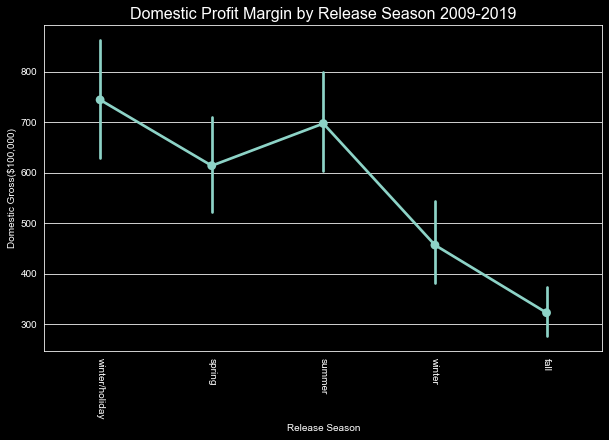

In [661]:
# profit margin/range of margin by season for all 2009-2019
# point Plot
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

sns.pointplot(x='release_season', y='domestic_gross /100,000', data=recent_movies_df)
plt.title("Domestic Profit Margin by Release Season 2009-2019", fontsize=16)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Release Season')

Text(0.5, 0, 'Release Season')

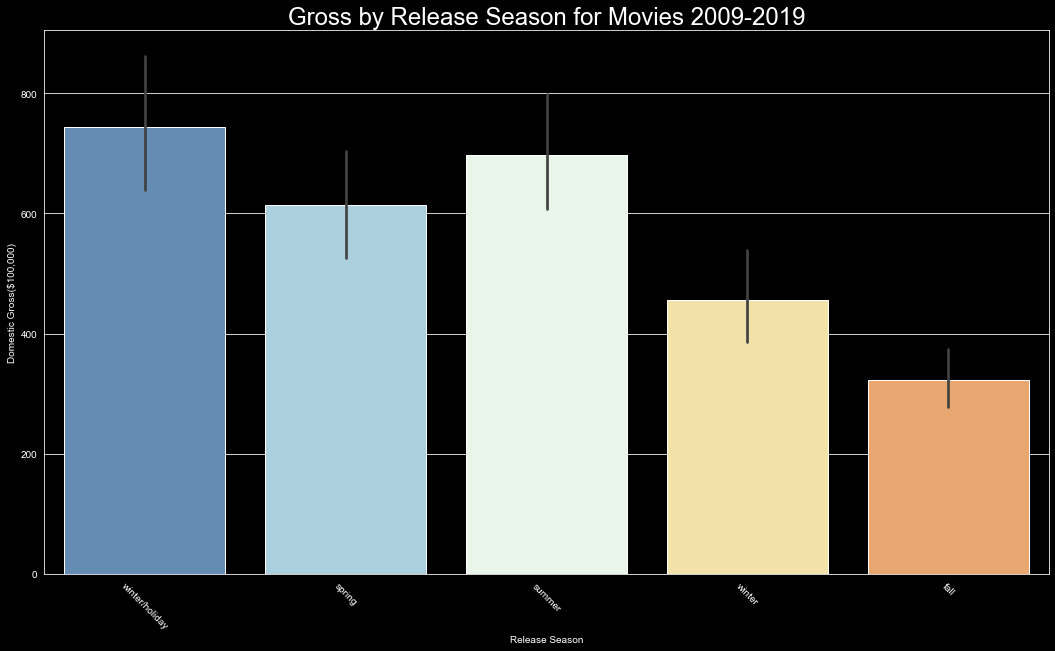

In [750]:
# gross by release season bar graph for  recent movies dataset 2009-2019
plt.figure(figsize=(18,10))
plt.style.use('dark_background')
sns.set_palette('RdYlBu_r')

# Bar Plot
sns.barplot(x='release_season', y='domestic_gross /100,000', data=recent_movies_df)
plt.title("Gross by Release Season for Movies 2009-2019", fontsize=24)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Release Season')

### Visualize data for Top 100 HIghest Earning Movies (domestic) 'top_50_dg'

## What types of movies make the highest profits at the box office?

In [772]:
top_50_dg.head(30)

,title,production_budget,"production_budget /100,000",domestic_gross,"domestic_gross /100,000",domestic_profit_margin,worldwide_gross,"worldwide_gross /100,000",intl_profit_margin,release_date,...,year,release_season,rating,genre,directors,writers,studio_name,audience_status,audience_rating,primary_genre
0,Avatar,425000000,4250.0,760507625.0,7605.07625,0.7894,2.776345e+09,27763.45279,5.5326,2009-12-18,...,2009,winter/holiday,PG-13,Action Adventure Comedy Mystery Suspense Sci...,James Cameron,James Cameron,20th Century Fox,Upright,82.0,Action
36,Black Panther,200000000,2000.0,700059566.0,7000.59566,2.5003,1.348258e+09,13482.58224,5.7413,2018-02-16,...,2018,winter,PG-13,Action Adventure Drama Science Fiction Fantasy,Ryan Coogler,"Joe Robert Cole, Ryan Coogler",Marvel Studios,Upright,79.0,Action
4,Avengers: Infinity War,300000000,3000.0,678815482.0,6788.15482,1.2627,2.048134e+09,20481.34200,5.8271,2018-04-27,...,2018,spring,PG-13,Action Adventure Science Fiction Fantasy,"Anthony Russo, Joe Russo","Christopher Markus, Stephen McFeely",Walt Disney Pictures,Upright,91.0,Action
25,Jurassic World,215000000,2150.0,652270625.0,6522.70625,2.0338,1.648855e+09,16488.54864,6.6691,2015-06-12,...,2015,summer,PG-13,Action Adventure Mystery Suspense Science Fi...,Colin Trevorrow,"Rick Jaffa, Amanda Silver, Derek Connolly, Col...",Universal Pictures,Upright,78.0,Action
20,The Avengers,225000000,2250.0,623279547.0,6232.79547,1.7701,1.517936e+09,15179.35897,5.7464,2012-05-04,...,2012,spring,PG-13,Action Adventure,Jeremiah S. Chechik,Don MacPherson,Warner Bros. Pictures,Spilled,15.0,Action
37,Incredibles 2,200000000,2000.0,608581744.0,6085.81744,2.0429,1.242521e+09,12425.20711,5.2126,2018-06-15,...,2018,summer,PG,Action Adventure Animation Kids Family,Brad Bird,Brad Bird,Disney/Pixar,Upright,84.0,Action
38,Rogue One: A Star Wars Story,200000000,2000.0,532177324.0,5321.77324,1.6609,1.049103e+09,10491.02856,4.2455,2016-12-16,...,2016,winter/holiday,PG-13,Action Adventure Drama Science Fiction Fantasy,Gareth Edwards (V),"George Lucas, Chris Weitz, Tony Gilroy",Walt Disney Pictures,Upright,86.0,Action
114,Beauty and the Beast,160000000,1600.0,504014165.0,5040.14165,2.1501,1.259200e+09,12591.99706,6.8700,2017-03-17,...,2017,spring,G,Animation Drama Kids Family Musical Performi...,Gary Trousdale,NaN,Buena Vista,Upright,92.0,Animation
39,Finding Dory,200000000,2000.0,486295561.0,4862.95561,1.4315,1.021215e+09,10212.15193,4.1061,2016-06-17,...,2016,summer,PG,Animation,"Andrew Stanton, Angus MacLane","Andrew Stanton, Victoria Strouse",Walt Disney Pictures/PIXAR,Upright,84.0,Animation
3,Avengers: Age of Ultron,330600000,3306.0,459005868.0,4590.05868,0.3884,1.403014e+09,14030.13963,3.2438,2015-05-01,...,2015,spring,PG-13,Action Adventure Science Fiction Fantasy,Joss Whedon,"Stan Lee, Jack Kirby, Joss Whedon",Walt Disney Pictures,Upright,83.0,Action


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

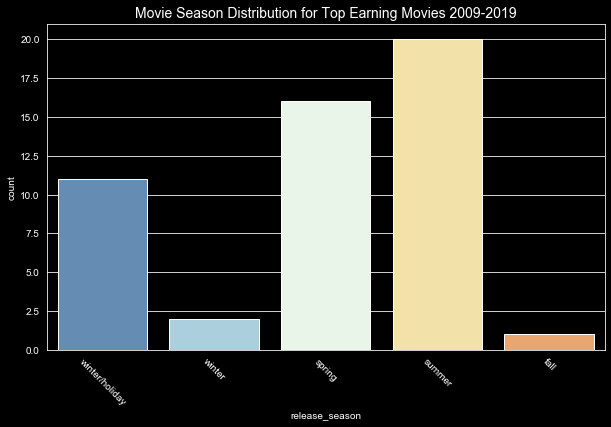

In [741]:
# release season count for top grossing
# high profit margin dataset release season count
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('RdYlBu_r')

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='release_season', data=top_50_dg)
plt.title("Movie Season Distribution for Top Earning Movies 2009-2019", fontsize=14)
# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

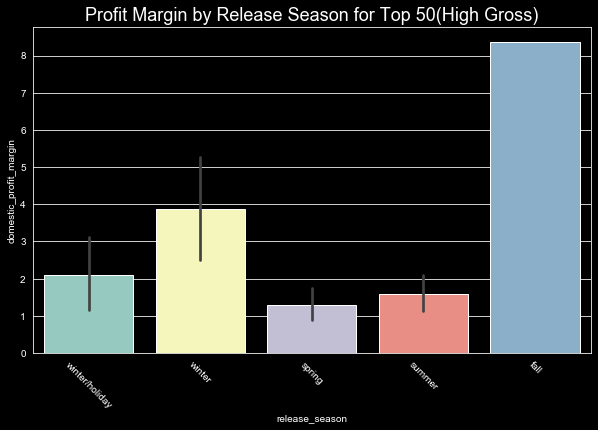

In [698]:
# highest grossing movies profit margin by release season bar graph
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

# Bar Plot
sns.barplot(x='release_season', y='domestic_profit_margin', data=top_50_dg)
plt.title("Profit Margin by Release Season for Top 50(High Gross)", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)

Text(0.5, 0, 'Release Season')

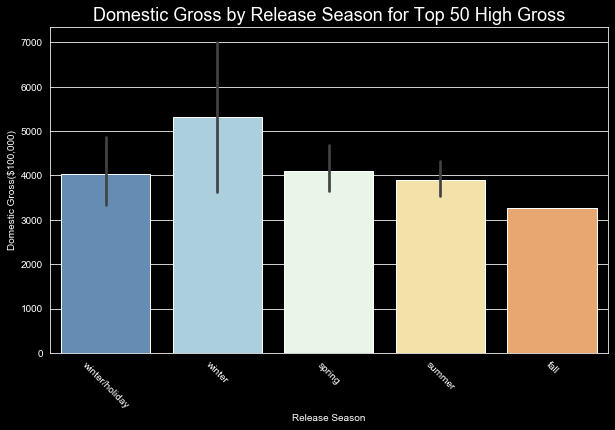

In [739]:
# highest gross by release season bar graph
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('RdYlBu_r')
# Bar Plot
sns.barplot(x='release_season', y='domestic_gross /100,000', data=top_50_dg)
plt.title("Domestic Gross by Release Season for Top 50 High Gross", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Release Season')

Text(0.5, 0, 'Genre')

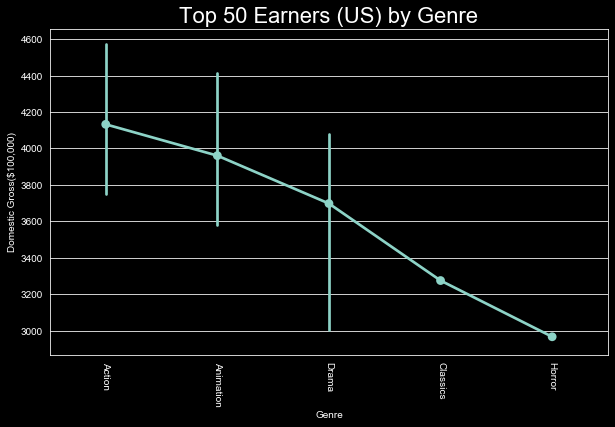

In [666]:
# domestic by genre for top grossing movies
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# point Plot
sns.pointplot(x='primary_genre', y='domestic_gross /100,000', data=top_50_dg)
plt.title("Top 50 Earners (US) by Genre", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Genre')

Text(0.5, 0, 'Genre')

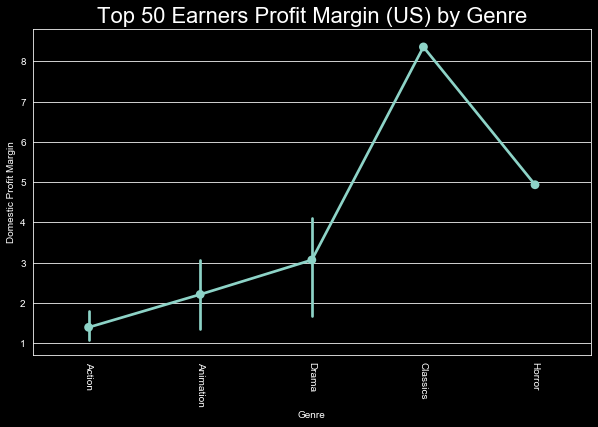

In [667]:
# domestic profit margin for top grossing movies
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# point Plot
sns.pointplot(x='primary_genre', y='domestic_profit_margin', data=top_50_dg)
plt.title("Top 50 Earners Profit Margin (US) by Genre", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.ylabel('Domestic Profit Margin')
plt.xlabel('Genre')

## Does the season of the movie release relate to how well the movie performs at the box office?

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]), <a list of 10 Text xticklabel objects>)

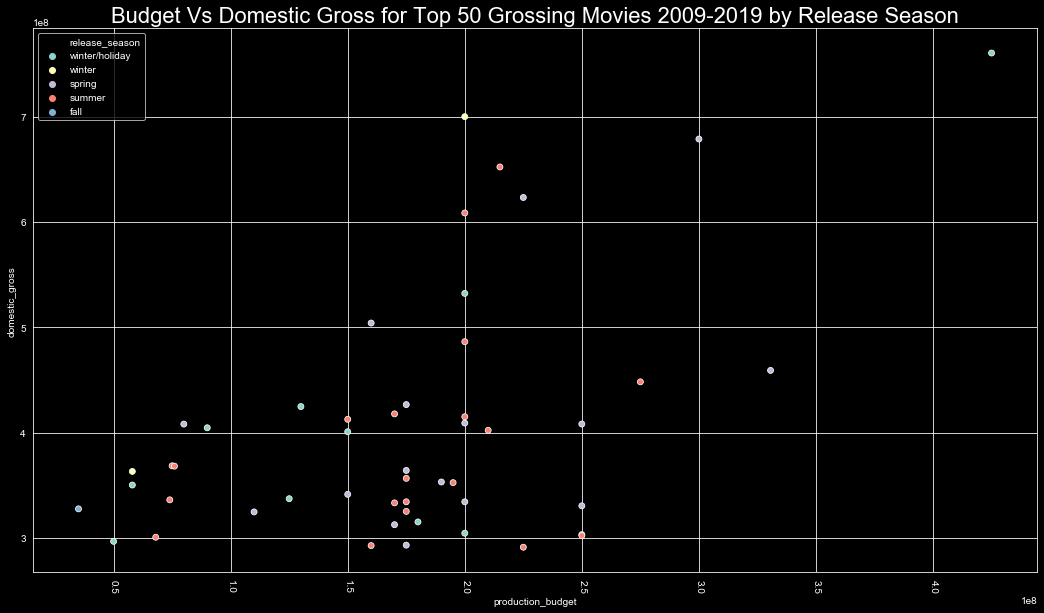

In [668]:
# budget vs domestic gross for top 50 domestic grossing movies by season of release
plt.figure(figsize=(18,10))

# Scatter Plot
sns.scatterplot(x='production_budget', y='domestic_gross', data=top_50_dg, hue='release_season')
plt.title("Budget Vs Domestic Gross for Top 50 Grossing Movies 2009-2019 by Release Season", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5, 0, 'Genre')

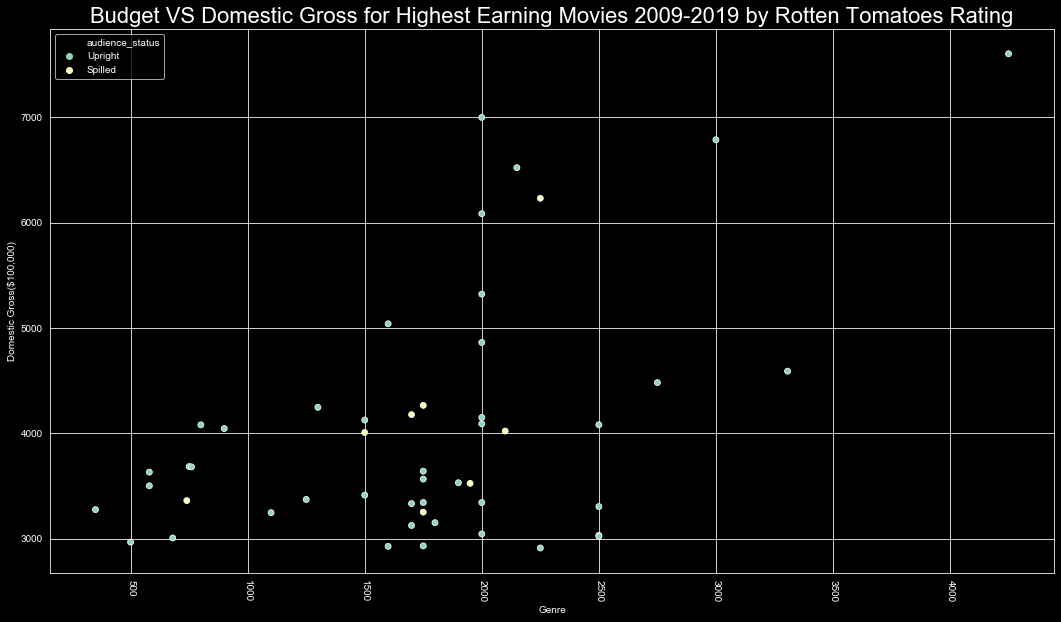

In [669]:
# budget vs domestic gross for top 50 domestic grossing movies by rotten tomatoes rating
plt.figure(figsize=(18,10))
plt.style.use('dark_background')
# Scatter Plot
sns.scatterplot(x='production_budget /100,000', y='domestic_gross /100,000', data=top_50_dg, hue='audience_status')
plt.title("Budget VS Domestic Gross for Highest Earning Movies 2009-2019 by Rotten Tomatoes Rating", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Genre')

Text(0.5, 1.0, 'Domestic Gross Distribution')

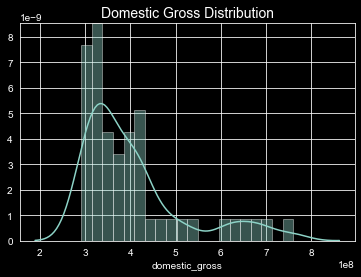

In [670]:
#distribution plot for domestic gross
sns.distplot(top_50_dg['domestic_gross'], bins=20)
plt.title("Domestic Gross Distribution", fontsize=14)

Text(0.5, 1.0, 'International Gross for Top 50 Grossing Movies 2009-2019')

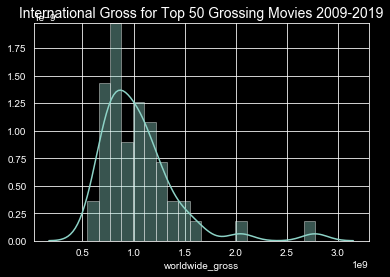

In [671]:
#distribution of int'l gross for highest earning movies
sns.distplot(top_50_dg['worldwide_gross'], bins=20)
plt.title("International Gross for Top 50 Grossing Movies 2009-2019", fontsize=14)

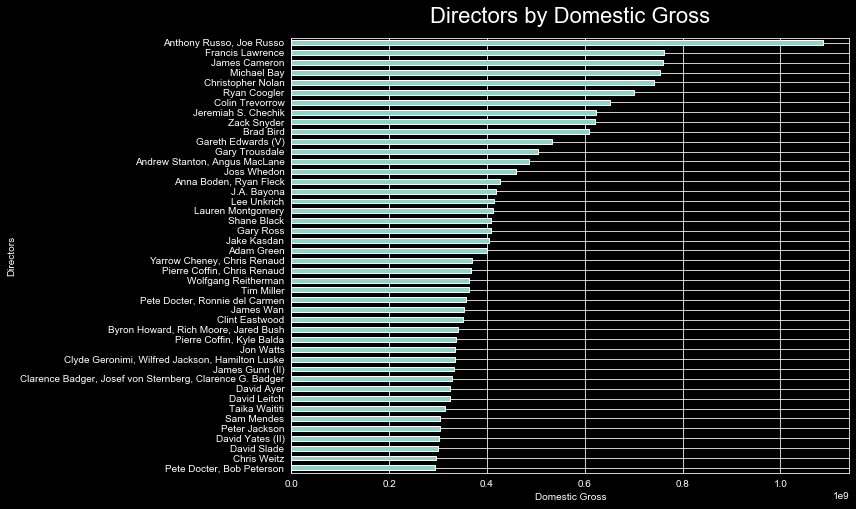

In [672]:
# directors with highest gross movies
to_plot = top_50_dg.groupby(['directors'])['domestic_gross'].sum().sort_values()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('Directors')
plt.xlabel('Domestic Gross')
plt.title("Directors by Domestic Gross", y=1.02, fontsize=22);

Text(0.5, 0, 'MPAA Rating')

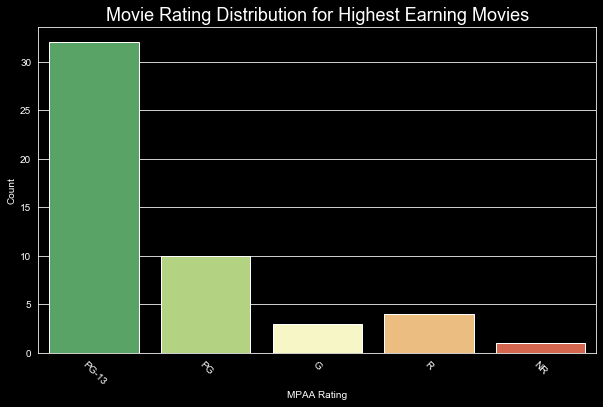

In [722]:
# mpaa rating for top 50 grossing movies
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='rating', data=top_50_dg, palette='RdYlGn_r')
plt.title("Movie Rating Distribution for Highest Earning Movies", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Count')
plt.xlabel('MPAA Rating')

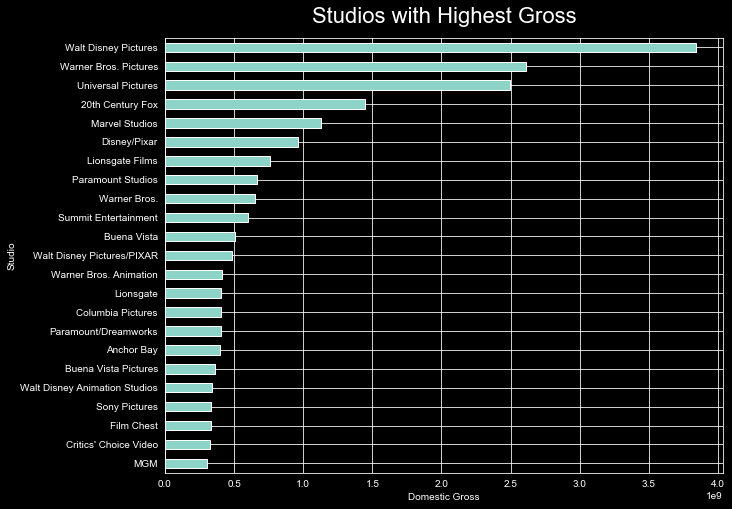

In [674]:
#studios with highest grossing movies
to_plot = top_50_dg.groupby(['studio_name'])['domestic_gross'].sum().sort_values()
plt.style.use('dark_background')
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('Studio')
plt.xlabel('Domestic Gross')
plt.title("Studios with Highest Gross", y=1.02, fontsize=22);

Text(0.5, 0, 'Genre')

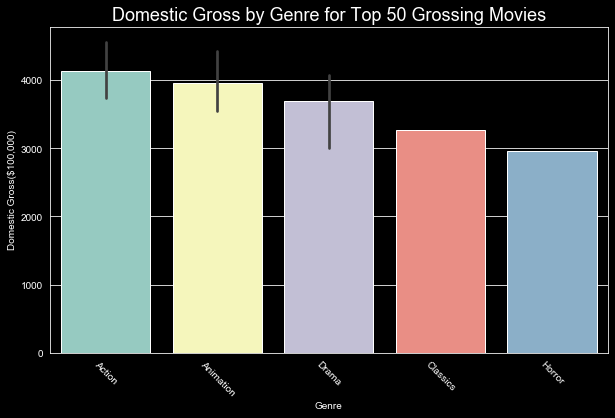

In [764]:
# gross by genre for high gross dataset
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='primary_genre', y='domestic_gross /100,000', data=top_50_dg)
plt.title("Domestic Gross by Genre for Top 50 Grossing Movies", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Genre')

Text(0.5, 0, 'Genre')

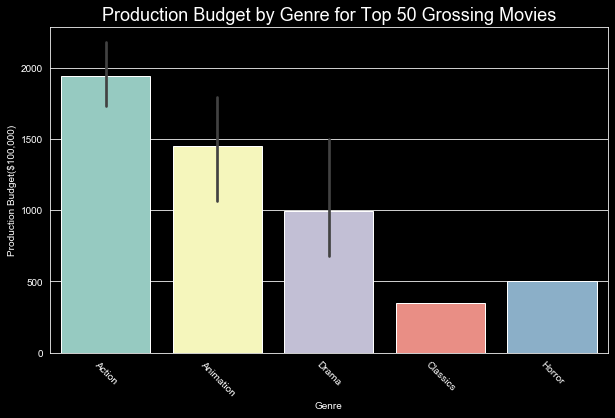

In [763]:
# budget by genre for high gross dataset
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='primary_genre', y='production_budget /100,000', data=top_50_dg)
plt.title("Production Budget by Genre for Top 50 Grossing Movies", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Production Budget($100,000)')
plt.xlabel('Genre')

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

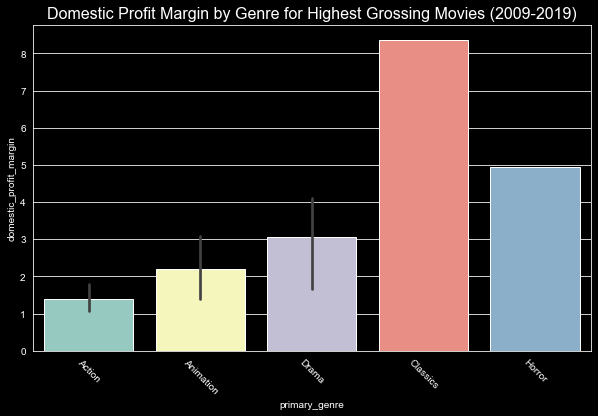

In [676]:
#profit margin by genre for high gross dataset
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

# Bar Plot
sns.barplot(x='primary_genre', y='domestic_profit_margin', data=top_50_dg)
plt.title("Domestic Profit Margin by Genre for Highest Grossing Movies (2009-2019)", fontsize=16)
# Rotate x-labels
plt.xticks(rotation=-45)

Text(0.5, 1.0, 'Domestic Gross for Top 50 Profitable Movies 2009-2019')

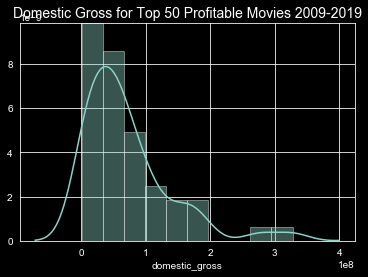

In [677]:
# distribution domestic gross for highest grossing movies
sns.distplot(top_50_dpm['domestic_gross'], bins=10)
plt.title("Domestic Gross for Top 50 Profitable Movies 2009-2019", fontsize=14)

###  Visualize Data for Top 100 Profitable Movies


## What types of movies make the most profit at the box office?

In [678]:
top_50_dpm.describe()

,production_budget,"production_budget /100,000",domestic_gross,"domestic_gross /100,000",domestic_profit_margin,worldwide_gross,"worldwide_gross /100,000",intl_profit_margin,month,year,audience_rating
count,5.000000e+01,50.000000,5.000000e+01,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.631400e+06,56.314000,7.112211e+07,711.221061,23.879518,1.270446e+08,1270.446418,42.311550,6.660000,2013.920000,61.600000
std,7.624984e+06,76.249839,6.865177e+07,686.517728,43.964891,1.335318e+08,1335.318383,80.529069,3.179077,2.790947,20.468991
min,1.000000e+05,1.000000,1.594798e+06,15.947980,6.923500,2.430735e+06,24.307350,9.107900,1.000000,2009.000000,22.000000
25%,1.000000e+06,10.000000,2.403704e+07,240.370403,9.123725,3.680353e+07,368.035315,13.948325,4.000000,2012.000000,49.500000
50%,3.000000e+06,30.000000,5.358164e+07,535.816400,12.999100,8.949719e+07,894.971940,23.166650,7.000000,2014.000000,61.500000
75%,5.000000e+06,50.000000,9.140098e+07,914.009835,17.551000,1.757715e+08,1757.714623,35.841375,9.750000,2016.000000,81.250000
max,3.500000e+07,350.000000,3.274817e+08,3274.817480,238.819600,6.974580e+08,6974.579690,430.517900,12.000000,2019.000000,91.000000


Text(0.5, 0, 'Genre')

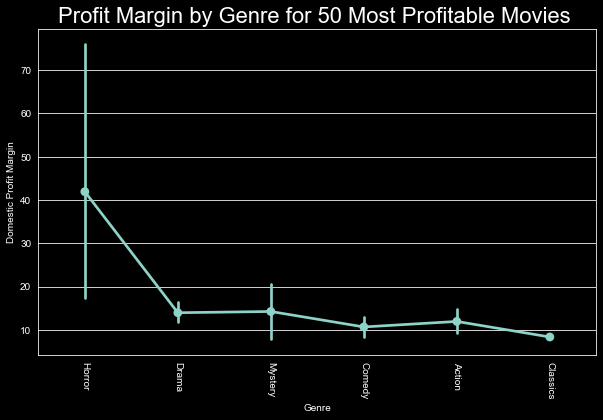

In [679]:
# profit margin/range of margin by genre for most profitable according to profit margin
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

# point Plot
sns.pointplot(x='primary_genre', y='domestic_profit_margin', data=top_50_dpm)
plt.title("Profit Margin by Genre for 50 Most Profitable Movies ", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)
plt.ylabel('Domestic Profit Margin')
plt.xlabel('Genre')

(array([-5000000.,        0.,  5000000., 10000000., 15000000., 20000000.,
        25000000., 30000000., 35000000., 40000000.]),
 <a list of 10 Text xticklabel objects>)

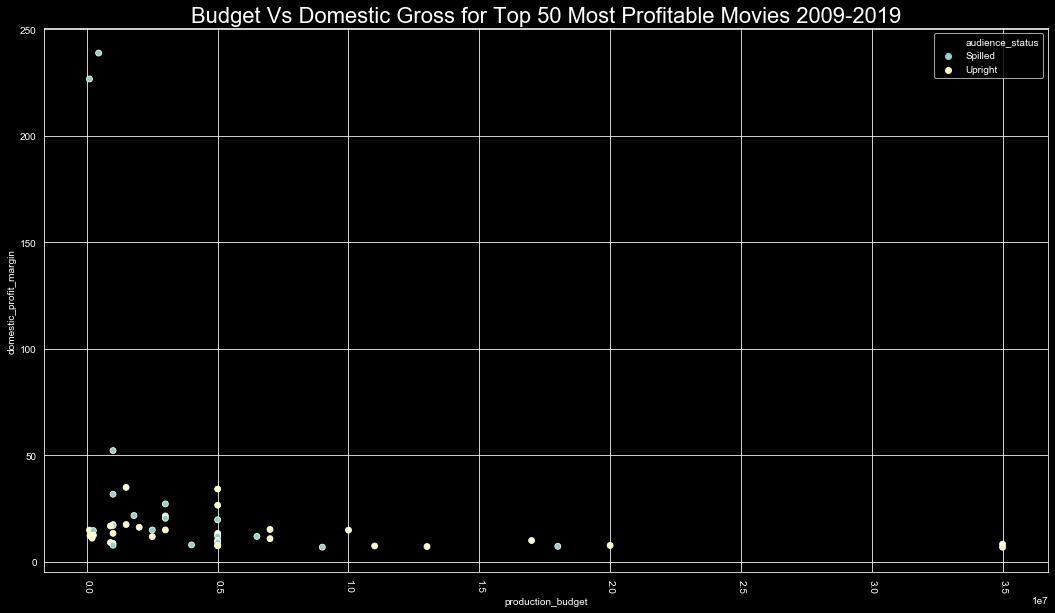

In [680]:
# budget vs gross for high profit margin movies by rotten tomatoes rating
plt.figure(figsize=(18,10))

# Scatter Plot
sns.scatterplot(x='production_budget', y='domestic_profit_margin', data=top_50_dpm, hue='audience_status')
plt.title("Budget Vs Domestic Gross for Top 50 Most Profitable Movies 2009-2019", fontsize=22)
# Rotate x-labels
plt.xticks(rotation=-90)

Text(0.5, 1.0, 'Domestic Gross for Top 50 Profitable Movies 2009-2019')

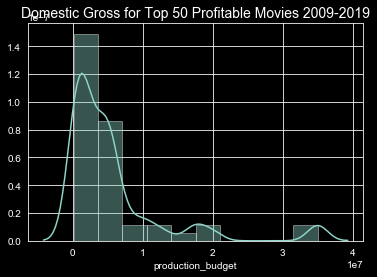

In [681]:
# distribution production budget for movies with highest profit margin
sns.distplot(top_50_dpm['production_budget'], bins=10)
plt.title("Domestic Gross for Top 50 Profitable Movies 2009-2019", fontsize=14)

Text(0.5, 0, 'Genre')

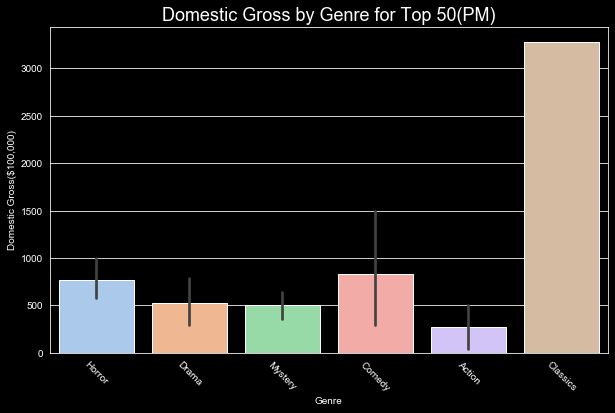

In [767]:
# profit margin by genre
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('pastel')
# Bar Plot
sns.barplot(x='primary_genre', y='domestic_gross /100,000', data=top_50_dpm)
plt.title("Domestic Gross by Genre for Top 50(PM)", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Domestic Gross($100,000)')
plt.xlabel('Genre')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

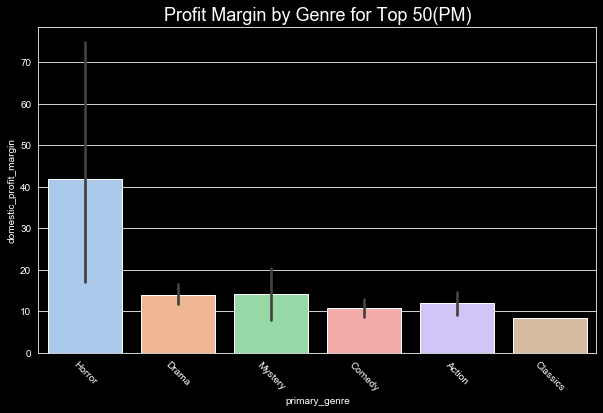

In [690]:
# profit margin by genre
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('pastel')
# Bar Plot
sns.barplot(x='primary_genre', y='domestic_profit_margin', data=top_50_dpm)
plt.title("Profit Margin by Genre for Top 50(PM)", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)

Text(0.5, 0, 'Genre')

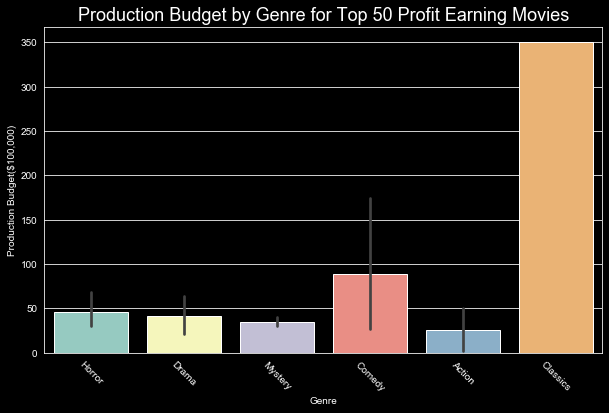

In [765]:
# budget by genre for high margin dataset
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
# Bar Plot
sns.barplot(x='primary_genre', y='production_budget /100,000', data=top_50_dpm)
plt.title("Production Budget by Genre for Top 50 Profit Earning Movies", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Production Budget($100,000)')
plt.xlabel('Genre')

## Does the season of the movie release relate to how well the movie performs at the box office?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

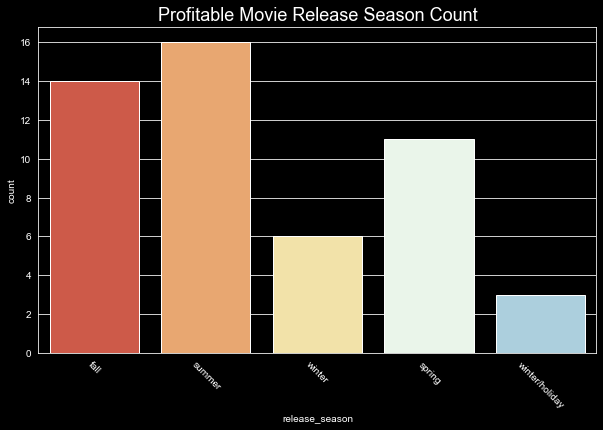

In [774]:
# high profit margin dataset release season count
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('RdYlBu')
# Bar Plot
sns.countplot(x='release_season', data=top_50_dpm)
plt.title("Profitable Movie Release Season Count", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

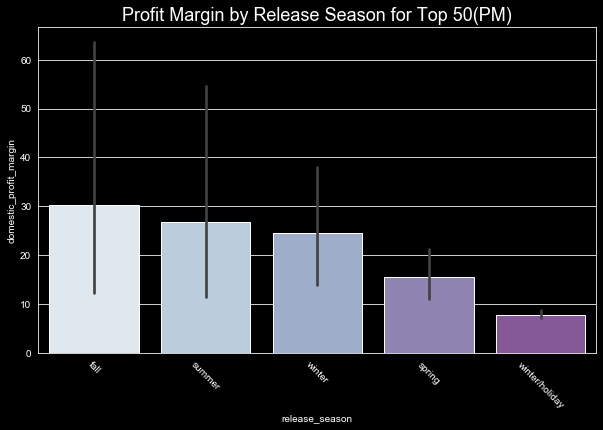

In [746]:
# profit margin by release season bar graph
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('BuPu')
# Bar Plot
sns.barplot(x='release_season', y='domestic_profit_margin', data=top_50_dpm)
plt.title("Profit Margin by Release Season for Top 50(PM)", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

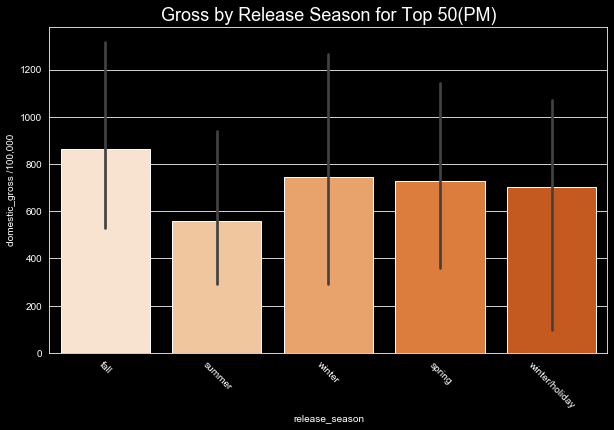

In [749]:
# most profitable gross by release season bar graph
plt.figure(figsize=(10,6))
plt.style.use('dark_background')
sns.set_palette('Oranges')

# Bar Plot
sns.barplot(x='release_season', y='domestic_gross /100,000', data=top_50_dpm)
plt.title("Gross by Release Season for Top 50(PM)", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)

Text(0.5, 0, 'MPAA Rating')

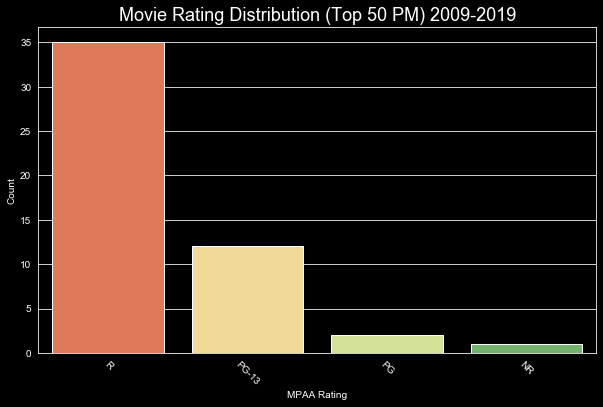

In [723]:
# most profitable movies rating
plt.figure(figsize=(10,6))
plt.style.use('dark_background')

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='rating', data=top_50_dpm, palette='RdYlGn')
plt.title("Movie Rating Distribution (Top 50 PM) 2009-2019", fontsize=18)
# Rotate x-labels
plt.xticks(rotation=-45)
plt.ylabel('Count')
plt.xlabel('MPAA Rating')

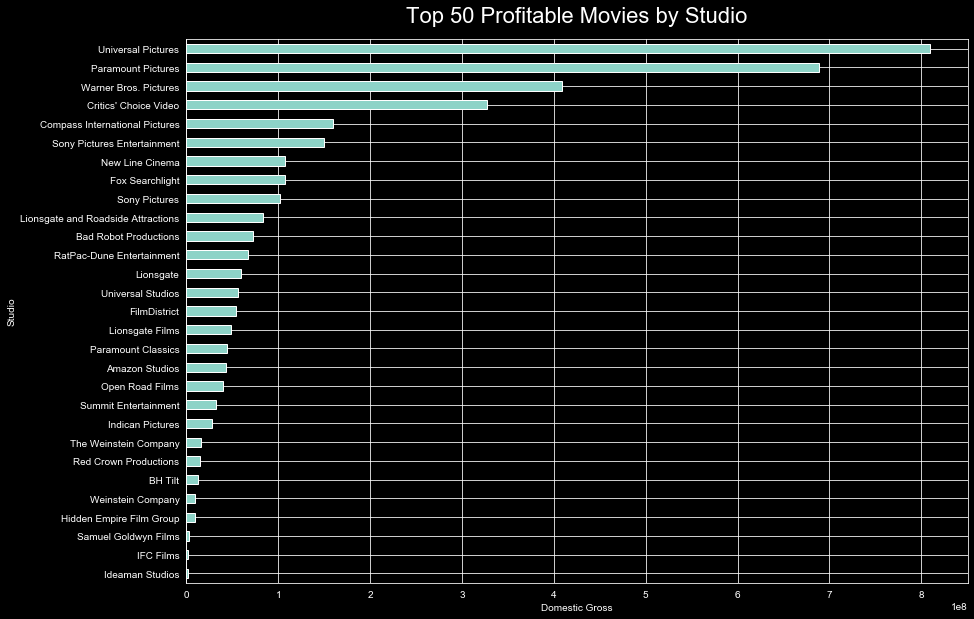

In [687]:
## most profitable movies by studio
to_plot = top_50_dpm.groupby(['studio_name'])['domestic_gross'].sum().sort_values()
plt.style.use('dark_background')
to_plot.plot(kind='barh', figsize=(14,10))
plt.ylabel('Studio')
plt.xlabel('Domestic Gross')
plt.title("Top 50 Profitable Movies by Studio", y=1.02, fontsize=22);

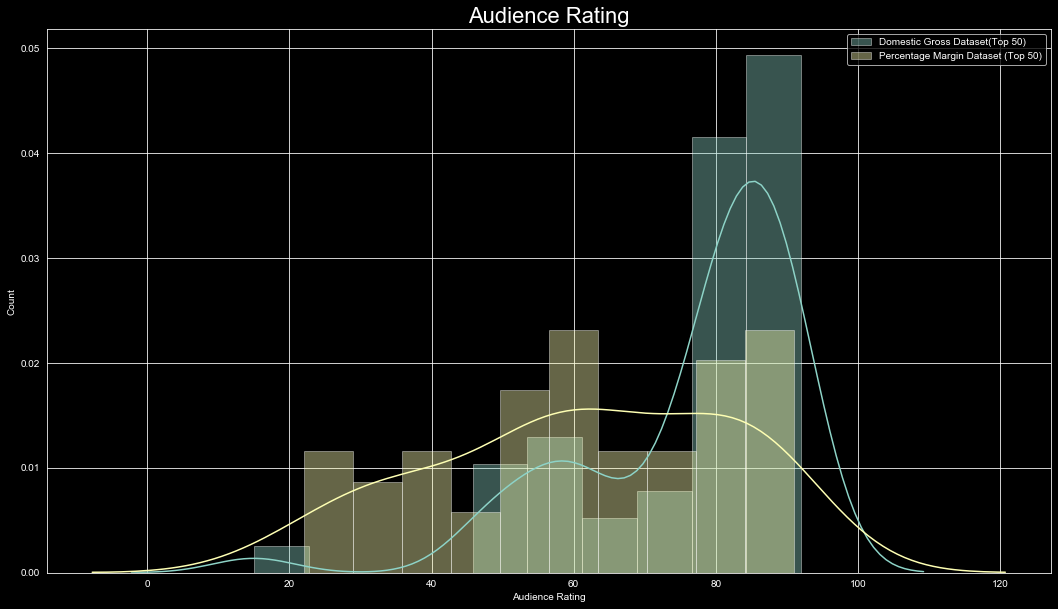

In [688]:
## domestic gross vs domestic profit margin regarding audience rating
plt.figure(figsize=(18,10))
sns.distplot(top_50_dg['audience_rating'], bins=10)
plt.style.use('dark_background')
plt.title("Average Audience Rating", fontsize=18)
sns.distplot(top_50_dpm['audience_rating'], bins=10)
plt.title("Audience Rating", fontsize=22)
plt.legend(['Domestic Gross Dataset(Top 50)', 'Percentage Margin Dataset (Top 50)'])
plt.ylabel('Count')
plt.xlabel('Audience Rating');